## Walmart Retail Demand Forecasting Project
## Predicting Weekly Sales Using Time Series Analysis

Project Overview

This project focuses on developing a demand forecasting model to predict future weekly sales for Walmart stores. Accurate demand forecasting plays a critical role in retail decision-making, enabling organizations to operate efficiently and remain competitive.

Importance of the Project

Effective sales forecasting provides several key benefits:

-->Inventory Management: Prevents overstocking, which leads to increased  holding costs and waste, as well as understocking, which can result in lost sales and dissatisfied customers.

-->Cost Optimization: Improves cash flow by minimizing unnecessary inventory storage and optimizing procurement decisions.

-->Supply Chain Planning: Supports better planning of logistics, warehouse operations, and delivery schedules across the supply chain.

Project Scope and Methodology
The project involves the following key steps:

1) Loading and exploring historical Walmart sales data from 2010 to 2012.

2) Analyzing sales patterns, trends, and seasonality.

3) Building a time-series forecasting model using Facebook Prophet.

4) Forecasting weekly sales for the next 12 weeks.

5) Evaluating the accuracy and performance of the forecasting model.


Dataset Information

Dataset Size: 421,570 records of weekly sales data
Coverage: 45 Walmart stores across 81 departments
Time Period: February 2010 to October 2012
Focus Area: Department 92, which has the highest sales volume and is likely representative of grocery-related products


---
## Phase 1: Setup and Installation

Phase 1: Setup and Installation


Libraries Used in This Project

The following libraries are used throughout the project:
pandas – Used for data manipulation and analysis, similar to working with spreadsheet-based data.
numpy – Provides efficient numerical and mathematical operations.
matplotlib and seaborn – Used for data visualization and graphical representation of trends and patterns.
prophet – A time-series forecasting library developed by Facebook, serving as the primary forecasting model in this project.
scikit-learn (sklearn) – Used to evaluate model performance and measure prediction accuracy.

In [1]:
# STEP 1: Import all necessary libraries
# The 'import' command loads a library so we can use it
# 'as' creates a short nickname (e.g., 'pd' instead of typing 'pandas' every time)

import pandas as pd                          # Data manipulation
import numpy as np                           # Numerical operations
import matplotlib.pyplot as plt              # Basic plotting
import seaborn as sns                        # Advanced/beautiful plotting
from prophet import Prophet                  # Forecasting model
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Accuracy metrics
import warnings

# This line hides warning messages to keep output clean
warnings.filterwarnings('ignore')

# Configure plotting style
sns.set_style('whitegrid')                   # Clean white background with grid lines
plt.rcParams['figure.figsize'] = (12, 6)     # Default chart size

print(" All libraries imported successfully!")
print("\n Libraries loaded:")
print("   - pandas (data handling)")
print("   - numpy (calculations)")
print("   - matplotlib & seaborn (visualization)")
print("   - prophet (forecasting)")
print("   - sklearn (evaluation)")

Importing plotly failed. Interactive plots will not work.


 All libraries imported successfully!

 Libraries loaded:
   - pandas (data handling)
   - numpy (calculations)
   - matplotlib & seaborn (visualization)
   - prophet (forecasting)
   - sklearn (evaluation)


---
## Phase 2: Data Loading & Understanding

###  What's in our dataset?

We have 4 CSV files:

1. train.csv - Historical weekly sales (our main data)
   - Store: Which Walmart store (1-45)
   - Dept: Which department (1-81)
   - Date: Week ending date
   - Weekly_Sales: $ amount sold that week
   - IsHoliday: TRUE/FALSE if it's a holiday week

2. features.csv - External factors that might affect sales
   - Temperature, Fuel_Price, CPI, Unemployment
   - MarkDowns (promotional discounts)

3. stores.csv - Store information
   - Type: A, B, or C (store category)
   - Size: Store square footage

4. test.csv - Test data (we won't use this yet)


In [2]:
# STEP 2: Load the CSV files into pandas DataFrames
# A DataFrame is like an Excel spreadsheet in Python

# IMPORTANT: Update these paths to where YOUR files are saved!
# Example: If files are in C:/Users/YourName/walmart_project/data/
# Use: 'C:/Users/YourName/walmart_project/data/train.csv'

DATA_PATH = '../retail_demand_forecasting/data/'

print(" Loading data files...\n")

# Load each CSV file
train_df = pd.read_csv(DATA_PATH + 'train.csv')
features_df = pd.read_csv(DATA_PATH + 'features.csv')
stores_df = pd.read_csv(DATA_PATH + 'stores.csv')

print(" Data loaded successfully!\n")

# Display basic information about each dataset
print("="*60)
print(" TRAIN.CSV - Main Sales Data")
print("="*60)
print(f"Rows: {train_df.shape[0]:,}")
print(f"Columns: {train_df.shape[1]}")
print(f"\nColumn Names: {list(train_df.columns)}")
print("\nFirst 3 rows:")
print(train_df.head(3))

print("\n" + "="*60)
print("🌡 FEATURES.CSV - External Factors")
print("="*60)
print(f"Rows: {features_df.shape[0]:,}")
print(f"Columns: {features_df.shape[1]}")
print(f"\nColumn Names: {list(features_df.columns)}")

print("\n" + "="*60)
print(" STORES.CSV - Store Information")
print("="*60)
print(f"Rows: {stores_df.shape[0]}")
print(f"Columns: {stores_df.shape[1]}")
print(stores_df.head())

 Loading data files...

 Data loaded successfully!

 TRAIN.CSV - Main Sales Data
Rows: 421,570
Columns: 5

Column Names: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']

First 3 rows:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False

🌡 FEATURES.CSV - External Factors
Rows: 8,190
Columns: 12

Column Names: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']

 STORES.CSV - Store Information
Rows: 45
Columns: 3
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [3]:
# STEP 3: Understanding the data better

print(" DATA QUALITY CHECK\n")
print("="*60)

# Check for missing values
print("Missing values in train.csv:")
print(train_df.isnull().sum())

print("\n" + "="*60)
print(" Date Range:")
print(f"Earliest date: {train_df['Date'].min()}")
print(f"Latest date: {train_df['Date'].max()}")

print("\n" + "="*60)
print(" Coverage:")
print(f"Number of unique stores: {train_df['Store'].nunique()}")
print(f"Number of unique departments: {train_df['Dept'].nunique()}")

print("\n" + "="*60)
print(" Sales Statistics:")
print(train_df['Weekly_Sales'].describe())

 DATA QUALITY CHECK

Missing values in train.csv:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

 Date Range:
Earliest date: 2010-02-05
Latest date: 2012-10-26

 Coverage:
Number of unique stores: 45
Number of unique departments: 81

 Sales Statistics:
count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64


---
## Phase 3: Data Cleaning & Preparation



In [4]:
# STEP 4: Find the best department to forecast
# Let's analyze which departments have the highest and most consistent sales

print(" Finding the best department for forecasting...\n")

# Group by department and calculate total sales
dept_analysis = train_df.groupby('Dept')['Weekly_Sales'].agg([
    ('Total_Sales', 'sum'),
    ('Avg_Sales', 'mean'),
    ('Num_Records', 'count')
]).reset_index()

# Sort by total sales (highest first)
dept_analysis = dept_analysis.sort_values('Total_Sales', ascending=False)

print(" Top 10 Departments by Total Sales:")
print("="*70)
print(dept_analysis.head(10).to_string(index=False))

# We'll use Department 92 (highest sales)
SELECTED_DEPT = 92
print(f"\n Selected Department: {SELECTED_DEPT}")
print(f"   Total Sales: ${dept_analysis[dept_analysis['Dept']==SELECTED_DEPT]['Total_Sales'].values[0]:,.2f}")
print("   (Likely grocery/food items based on high sales volume)")

 Finding the best department for forecasting...

 Top 10 Departments by Total Sales:
 Dept  Total_Sales    Avg_Sales  Num_Records
   92 483943341.87 75204.870531         6435
   95 449320162.52 69824.423080         6435
   38 393118136.92 61090.619568         6435
   72 305725152.21 50566.515417         6046
   90 291068463.68 45232.084488         6435
   40 288936022.05 44900.702727         6435
    2 280611174.43 43607.020113         6435
   91 216781705.73 33687.910758         6435
   13 197321569.95 30663.802634         6435
    8 194280780.73 30191.263517         6435

 Selected Department: 92
   Total Sales: $483,943,341.87
   (Likely grocery/food items based on high sales volume)


In [5]:
# STEP 5: Filter and prepare data for Department 92

print(f"🔧 Preparing data for Department {SELECTED_DEPT}...\n")

# Filter only Department 92
dept_data = train_df[train_df['Dept'] == SELECTED_DEPT].copy()

print(f" Filtered to Department {SELECTED_DEPT}")
print(f"   Records: {len(dept_data):,}")

# Convert 'Date' column to datetime format
dept_data['Date'] = pd.to_datetime(dept_data['Date'])

print("\n Date conversion complete")
print(f"   Date range: {dept_data['Date'].min().date()} to {dept_data['Date'].max().date()}")

# Aggregate sales by date (sum across all stores)
weekly_sales = dept_data.groupby('Date').agg({
    'Weekly_Sales': 'sum',
    'IsHoliday': 'first'
}).reset_index()

print("\n Aggregated sales across all stores")
print(f"   Total weeks: {len(weekly_sales)}")

# Sort by date (oldest to newest)
weekly_sales = weekly_sales.sort_values('Date').reset_index(drop=True)

print("\n Sample of aggregated data:")
print(weekly_sales.head())

🔧 Preparing data for Department 92...

 Filtered to Department 92
   Records: 6,435

 Date conversion complete
   Date range: 2010-02-05 to 2012-10-26

 Aggregated sales across all stores
   Total weeks: 143

 Sample of aggregated data:
        Date  Weekly_Sales  IsHoliday
0 2010-02-05    3781162.87      False
1 2010-02-12    3443837.30       True
2 2010-02-19    3312991.71      False
3 2010-02-26    3204210.06      False
4 2010-03-05    3480725.21      False


In [6]:
# STEP 6: Format data for Prophet
# Prophet requires EXACTLY these column names:
# - 'ds' for dates (datestamp)
# - 'y' for the values we want to predict

print(" Formatting data for Prophet model...\n")

# Create Prophet-formatted dataset
prophet_df = pd.DataFrame({
    'ds': weekly_sales['Date'],           # ds = datestamp
    'y': weekly_sales['Weekly_Sales']     # y = target variable (what we predict)
})

print(" Data formatted for Prophet")
print(f"   Rows: {len(prophet_df)}")
print(f"   Columns: {list(prophet_df.columns)}")
print("\nFirst 5 rows:")
print(prophet_df.head())

print("\nLast 5 rows:")
print(prophet_df.tail())

# Summary statistics
print("\n Sales Statistics:")
print(f"   Average Weekly Sales: ${prophet_df['y'].mean():,.2f}")
print(f"   Minimum Weekly Sales: ${prophet_df['y'].min():,.2f}")
print(f"   Maximum Weekly Sales: ${prophet_df['y'].max():,.2f}")
print(f"   Standard Deviation: ${prophet_df['y'].std():,.2f}")

 Formatting data for Prophet model...

 Data formatted for Prophet
   Rows: 143
   Columns: ['ds', 'y']

First 5 rows:
          ds           y
0 2010-02-05  3781162.87
1 2010-02-12  3443837.30
2 2010-02-19  3312991.71
3 2010-02-26  3204210.06
4 2010-03-05  3480725.21

Last 5 rows:
            ds           y
138 2012-09-28  3332543.07
139 2012-10-05  3879477.82
140 2012-10-12  3798269.98
141 2012-10-19  3570802.32
142 2012-10-26  3527936.66

 Sales Statistics:
   Average Weekly Sales: $3,384,219.17
   Minimum Weekly Sales: $2,624,151.62
   Maximum Weekly Sales: $4,647,997.52
   Standard Deviation: $327,203.41


---
## Phase 4: Exploratory Data Analysis (EDA)



 Creating visualization...



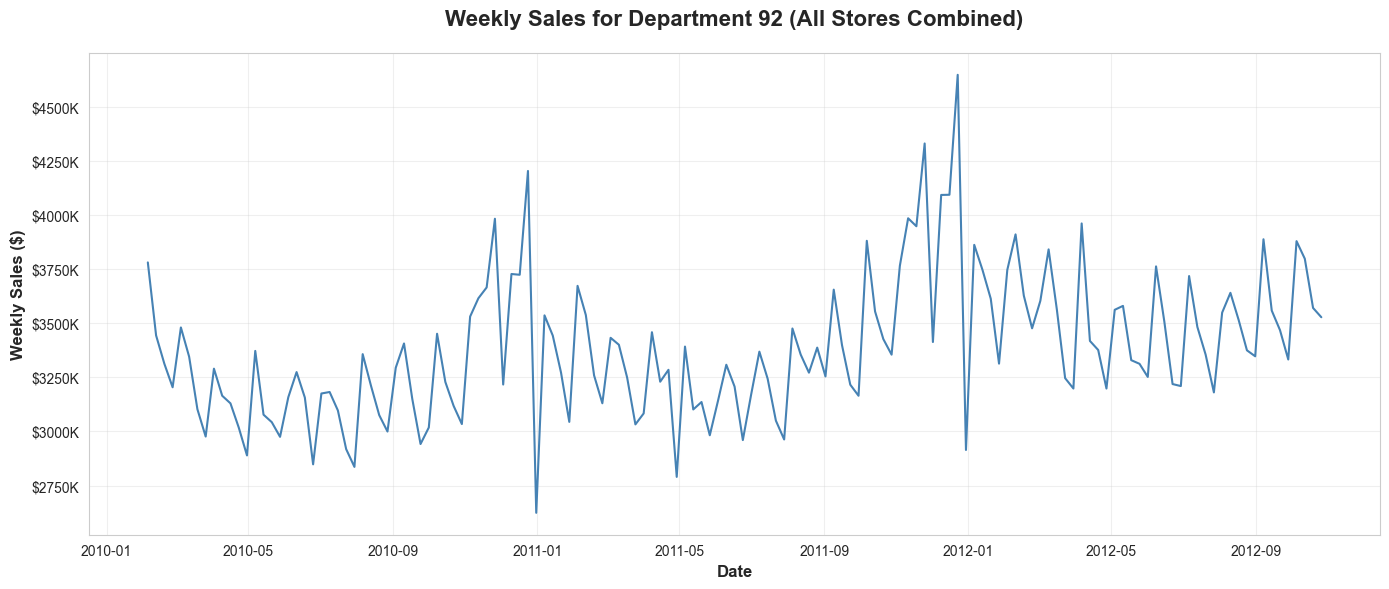


 What do we see?
   Look for:
   - Overall trend (upward/downward/flat)
   - Seasonal patterns (repeating peaks/valleys)
   - Outliers (unusual spikes)


In [7]:
# STEP 7: Visualize the complete time series

print(" Creating visualization...\n")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the time series
ax.plot(prophet_df['ds'], prophet_df['y'], color='steelblue', linewidth=1.5)

# Customize the plot
ax.set_title(f'Weekly Sales for Department {SELECTED_DEPT} (All Stores Combined)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Weekly Sales ($)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)  # Light grid lines

# Format y-axis to show values in thousands (K)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

print("\n What do we see?")
print("   Look for:")
print("   - Overall trend (upward/downward/flat)")
print("   - Seasonal patterns (repeating peaks/valleys)")
print("   - Outliers (unusual spikes)")

 Analyzing seasonal patterns...



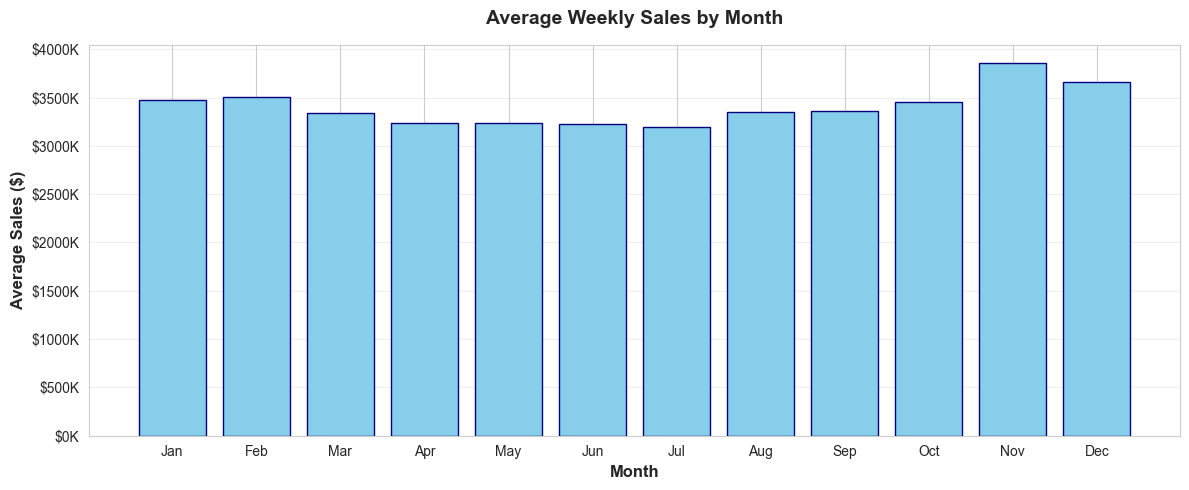


 Monthly Sales Analysis:
Jan: $3,478,973.84
Feb: $3,508,662.05
Mar: $3,344,089.33
Apr: $3,235,334.51
May: $3,238,798.25
Jun: $3,231,456.27
Jul: $3,195,865.99
Aug: $3,350,922.12
Sep: $3,363,942.37
Oct: $3,449,667.00
Nov: $3,853,107.17
Dec: $3,665,936.09

 Highest month: Nov ($3,853,107.17)
 Lowest month: Jul ($3,195,865.99)


In [8]:
# STEP 8: Analyze seasonality patterns
# Let's look at sales by month and year to spot patterns

print(" Analyzing seasonal patterns...\n")

# Add month and year columns for analysis
analysis_df = prophet_df.copy()
analysis_df['Month'] = analysis_df['ds'].dt.month
analysis_df['Year'] = analysis_df['ds'].dt.year
analysis_df['Month_Name'] = analysis_df['ds'].dt.strftime('%b')  # Jan, Feb, etc.

# Calculate average sales by month
monthly_avg = analysis_df.groupby('Month_Name')['y'].mean().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(monthly_avg.index, monthly_avg.values, color='skyblue', edgecolor='navy')

# Customize
ax.set_title('Average Weekly Sales by Month', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Sales ($)', fontsize=12, fontweight='bold')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n Monthly Sales Analysis:")
print("="*50)
for month, sales in monthly_avg.items():
    print(f"{month}: ${sales:,.2f}")

print(f"\n Highest month: {monthly_avg.idxmax()} (${monthly_avg.max():,.2f})")
print(f" Lowest month: {monthly_avg.idxmin()} (${monthly_avg.min():,.2f})")

 Comparing sales across years...



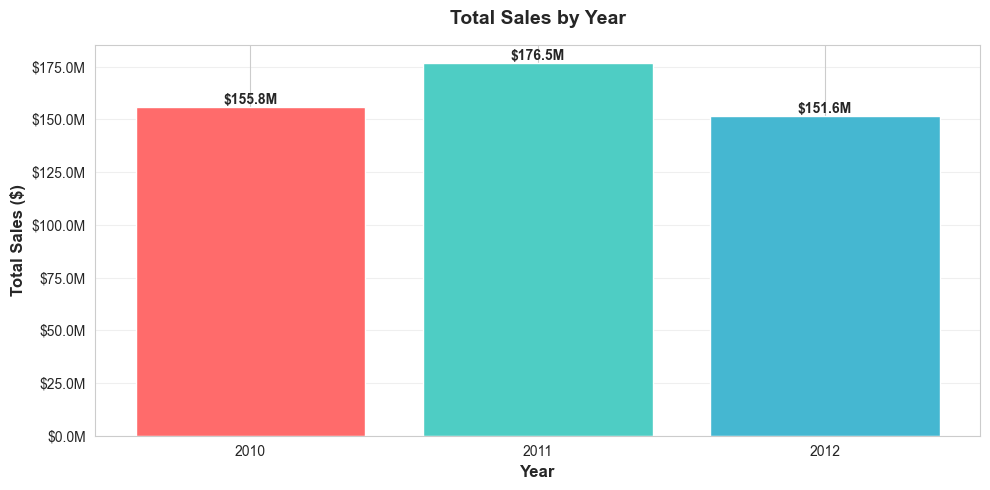


 Yearly Sales:
   2010: $155,837,575.89
   2011: $176,476,325.00
   2012: $151,629,440.98


In [9]:
# STEP 9: Year-over-year comparison

print(" Comparing sales across years...\n")

# Calculate total sales by year
yearly_sales = analysis_df.groupby('Year')['y'].sum()

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(yearly_sales.index.astype(str), yearly_sales.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax.set_title('Total Sales by Year', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(yearly_sales.values):
    ax.text(i, v, f'${v/1e6:.1f}M', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n Yearly Sales:")
for year, sales in yearly_sales.items():
    print(f"   {year}: ${sales:,.2f}")

In [10]:
# STEP 10: Statistical summary

print(" STATISTICAL SUMMARY")
print("="*60)

print("\n📏 Distribution Statistics:")
print(f"   Mean (average): ${prophet_df['y'].mean():,.2f}")
print(f"   Median (middle value): ${prophet_df['y'].median():,.2f}")
print(f"   Std Dev (variability): ${prophet_df['y'].std():,.2f}")
print(f"   Min: ${prophet_df['y'].min():,.2f}")
print(f"   Max: ${prophet_df['y'].max():,.2f}")
print(f"   Range: ${prophet_df['y'].max() - prophet_df['y'].min():,.2f}")

# Calculate coefficient of variation (measures relative variability)
cv = (prophet_df['y'].std() / prophet_df['y'].mean()) * 100
print(f"\n Coefficient of Variation: {cv:.2f}%")
if cv < 20:
    print("   → Low variability (stable sales)")
elif cv < 40:
    print("   → Moderate variability")
else:
    print("   → High variability (unstable sales)")

 STATISTICAL SUMMARY

📏 Distribution Statistics:
   Mean (average): $3,384,219.17
   Median (middle value): $3,347,357.30
   Std Dev (variability): $327,203.41
   Min: $2,624,151.62
   Max: $4,647,997.52
   Range: $2,023,845.90

 Coefficient of Variation: 9.67%
   → Low variability (stable sales)


---
## Phase 5: Model Building with Facebook Prophet




In [11]:
# STEP 11: Split data into training and validation sets
# Why? To test how well our model predicts on "unseen" data

print("✂ Splitting data into training and validation sets...\n")

# We'll use last 12 weeks for validation (to test accuracy)
# Rest will be used for training the model
VALIDATION_WEEKS = 12

# Calculate split point
split_date = prophet_df['ds'].max() - pd.Timedelta(weeks=VALIDATION_WEEKS)

# Split the data
train_data = prophet_df[prophet_df['ds'] <= split_date].copy()
validation_data = prophet_df[prophet_df['ds'] > split_date].copy()

print(" Data Split Summary:")
print("="*60)
print(f"Total records: {len(prophet_df)}")
print(f"\nTraining set: {len(train_data)} weeks")
print(f"   From: {train_data['ds'].min().date()}")
print(f"   To: {train_data['ds'].max().date()}")
print(f"\nValidation set: {len(validation_data)} weeks")
print(f"   From: {validation_data['ds'].min().date()}")
print(f"   To: {validation_data['ds'].max().date()}")

print("\n Why split data?")
print("   - Train on past data (what the model learns from)")
print("   - Validate on recent data (to test prediction accuracy)")
print("   - This simulates real-world forecasting!")

✂ Splitting data into training and validation sets...

 Data Split Summary:
Total records: 143

Training set: 131 weeks
   From: 2010-02-05
   To: 2012-08-03

Validation set: 12 weeks
   From: 2012-08-10
   To: 2012-10-26

 Why split data?
   - Train on past data (what the model learns from)
   - Validate on recent data (to test prediction accuracy)
   - This simulates real-world forecasting!


In [12]:
# STEP 12: Initialize Prophet Model

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    interval_width=0.95,
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10,
)

print(" Prophet model initialized")

 Prophet model initialized


In [13]:
# STEP 13: Train the Model

print("🎓 Training model...\n")
model.fit(prophet_df)
print(" Training complete!")
print(f"Trained on {len(prophet_df)} weeks")
print(f"From {prophet_df['ds'].min().date()} to {prophet_df['ds'].max().date()}")


17:43:10 - cmdstanpy - INFO - Chain [1] start processing
17:43:10 - cmdstanpy - INFO - Chain [1] done processing


🎓 Training model...

 Training complete!
Trained on 143 weeks
From 2010-02-05 to 2012-10-26


---
## Phase 6: Making Predictions

### Two types of predictions:

1. In-sample predictions (on validation data)
2. Out-of-sample predictions (future forecast)
   


In [15]:
# STEP 14: Make predictions on validation data

print(" Making predictions on validation period...\n")

# Predict on validation dates
validation_forecast = model.predict(validation_data[['ds']])

print(" Validation predictions complete")
print(f"   Predicted {len(validation_forecast)} weeks\n")

# Display sample predictions
print(" Sample predictions (first 5 weeks):")
print("="*80)
results = pd.DataFrame({
    'Date': validation_data['ds'].values,
    'Actual Sales': validation_data['y'].values,
    'Predicted Sales': validation_forecast['yhat'].values,
    'Lower Bound (95%)': validation_forecast['yhat_lower'].values,
    'Upper Bound (95%)': validation_forecast['yhat_upper'].values
})

# Format numbers for better readability
pd.options.display.float_format = '{:,.2f}'.format
print(results.head())

print("\n Understanding the output:")
print("   - Actual Sales: What really happened")
print("   - Predicted Sales: What our model forecasted")
print("   - Lower/Upper Bound: 95% confidence range")
print("     (We're 95% confident actual sales will be in this range)")

 Making predictions on validation period...

 Validation predictions complete
   Predicted 12 weeks

 Sample predictions (first 5 weeks):
        Date  Actual Sales  Predicted Sales  Lower Bound (95%)  \
0 2012-08-10  3,640,675.55     3,461,236.75       3,038,220.84   
1 2012-08-17  3,514,723.07     3,506,077.71       3,040,204.01   
2 2012-08-24  3,374,945.23     3,590,237.79       3,168,591.37   
3 2012-08-31  3,347,357.30     3,640,332.04       3,190,681.31   
4 2012-09-07  3,888,167.02     3,604,385.80       3,169,455.21   

   Upper Bound (95%)  
0       3,936,667.59  
1       3,912,218.76  
2       4,002,484.96  
3       4,086,523.99  
4       4,047,945.13  

 Understanding the output:
   - Actual Sales: What really happened
   - Predicted Sales: What our model forecasted
   - Lower/Upper Bound: 95% confidence range
     (We're 95% confident actual sales will be in this range)


In [16]:
# STEP 15: Forecast the next 12 weeks (future predictions)

print(" Creating future forecast...\n")

FORECAST_WEEKS = 12

# First, let's see our current data range
print(f"Historical data range: {prophet_df['ds'].min().date()} to {prophet_df['ds'].max().date()}")
print(f"Total historical weeks: {len(prophet_df)}\n")

# Create future dates dataframe
future = model.make_future_dataframe(periods=FORECAST_WEEKS, freq='W')
print(f"Created future dates: {len(future)} total periods")
print(f"Forecast will go to: {future['ds'].max().date()}\n")

# Generate forecast for all dates (historical + future)
forecast = model.predict(future)
print(" Forecast generated!\n")

# Separate future predictions
last_date = prophet_df['ds'].max()
future_forecast = forecast[forecast['ds'] > last_date].copy()
future_forecast.reset_index(drop=True, inplace=True)

# Verify we have data
print(f" Forecast Summary:")
print(f"   Historical periods: {len(prophet_df)}")
print(f"   Future predictions: {len(future_forecast)}")

if len(future_forecast) == 0:
    print("\n ERROR: No future forecast created!")
    print("Troubleshooting...")
    print(f"Last historical date: {last_date}")
    print(f"Max forecast date: {forecast['ds'].max()}")
    raise ValueError("Future forecast is empty! Check your data.")

print("\n Future Sales Predictions (Next 12 Weeks):")
print("="*80)

# Display predictions
display_df = pd.DataFrame({
    'Week': range(1, len(future_forecast) + 1),
    'Date': future_forecast['ds'].dt.strftime('%Y-%m-%d'),
    'Predicted_Sales': future_forecast['yhat'].round(2),
    'Lower_95%': future_forecast['yhat_lower'].round(2),
    'Upper_95%': future_forecast['yhat_upper'].round(2)
})

print(display_df.to_string(index=False))

print("\n Quick Stats:")
print(f"   Average: ${future_forecast['yhat'].mean():,.2f}")
print(f"   Total: ${future_forecast['yhat'].sum():,.2f}")
print(f"   Min: ${future_forecast['yhat'].min():,.2f}")
print(f"   Max: ${future_forecast['yhat'].max():,.2f}")

 Creating future forecast...

Historical data range: 2010-02-05 to 2012-10-26
Total historical weeks: 143

Created future dates: 155 total periods
Forecast will go to: 2013-01-13

 Forecast generated!

 Forecast Summary:
   Historical periods: 143
   Future predictions: 12

 Future Sales Predictions (Next 12 Weeks):
 Week       Date  Predicted_Sales    Lower_95%    Upper_95%
    1 2012-10-28     4,124,497.89 3,686,938.96 4,516,264.56
    2 2012-11-04     4,322,768.05 3,864,920.78 4,780,173.86
    3 2012-11-11     4,554,848.55 4,125,323.22 4,969,372.72
    4 2012-11-18     4,662,840.83 4,272,061.34 5,086,277.75
    5 2012-11-25     4,623,662.49 4,192,591.20 5,082,365.15
    6 2012-12-02     4,564,437.42 4,120,557.42 5,014,989.30
    7 2012-12-09     4,597,262.30 4,146,867.78 5,019,173.17
    8 2012-12-16     4,674,411.75 4,244,876.43 5,120,910.37
    9 2012-12-23     4,644,530.13 4,196,635.45 5,063,216.47
   10 2012-12-30     4,446,376.57 4,004,629.07 4,880,367.41
   11 2013-01-06     4

---
## Phase 7: Model Evaluation

### How do we measure accuracy?

We use 3 common metrics:

1. MAE (Mean Absolute Error)
   
2. RMSE (Root Mean Squared Error)

3. MAPE (Mean Absolute Percentage Error)
   
### What's considered "good"?
- MAPE < 10%: Excellent
- MAPE 10-20%: Good
- MAPE 20-50%: Acceptable
- MAPE > 50%: Needs improvement


In [17]:
# STEP 16: Calculate evaluation metrics

print(" EVALUATING MODEL PERFORMANCE\n")
print("="*60)

# Get actual and predicted values
y_true = validation_data['y'].values           # Actual sales
y_pred = validation_forecast['yhat'].values    # Predicted sales

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE calculation
# MAPE = (|Actual - Predicted| / Actual) × 100
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(" Accuracy Metrics:")
print("\n1️ MAE (Mean Absolute Error)")
print(f"   ${mae:,.2f}")
print(f"   → On average, predictions are off by ${mae:,.2f}")

print("\n2⃣ RMSE (Root Mean Squared Error)")
print(f"   ${rmse:,.2f}")
print(f"   → Penalizes larger errors more than MAE")

print("\n3️ MAPE (Mean Absolute Percentage Error)")
print(f"   {mape:.2f}%")
print(f"   → On average, predictions are off by {mape:.2f}%")

# Interpret MAPE
print("\n Model Quality Assessment:")
if mape < 10:
    quality = "Excellent"
elif mape < 20:
    quality = "Good"
elif mape < 30:
    quality = "Acceptable"
else:
    quality = "Needs Improvement"
    
print(f"   {quality}")

# Calculate additional insights
avg_sales = validation_data['y'].mean()
error_pct = (mae / avg_sales) * 100

print("\n Context:")
print(f"   Average actual sales: ${avg_sales:,.2f}")
print(f"   Error as % of avg sales: {error_pct:.2f}%")

print("\n" + "="*60)

 EVALUATING MODEL PERFORMANCE

 Accuracy Metrics:

1️ MAE (Mean Absolute Error)
   $149,075.47
   → On average, predictions are off by $149,075.47

2⃣ RMSE (Root Mean Squared Error)
   $178,458.97
   → Penalizes larger errors more than MAE

3️ MAPE (Mean Absolute Percentage Error)
   4.19%
   → On average, predictions are off by 4.19%

 Model Quality Assessment:
   Excellent

 Context:
   Average actual sales: $3,575,148.11
   Error as % of avg sales: 4.17%



 Creating accuracy visualization...



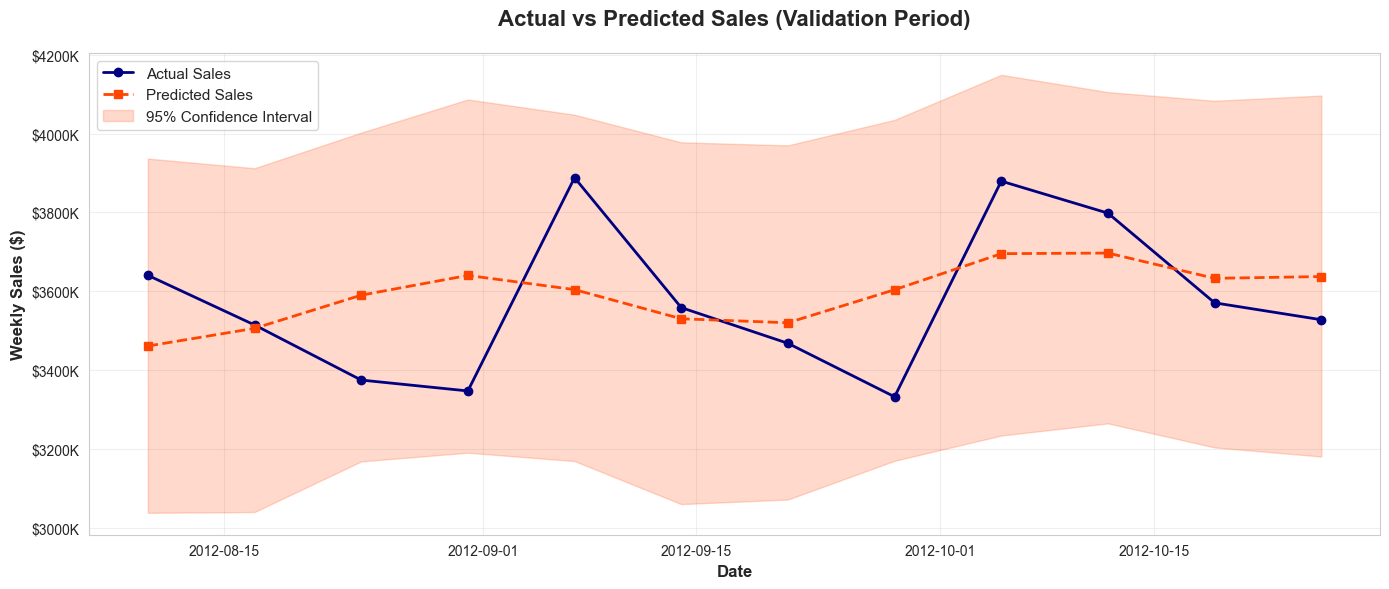

 Visualization complete!

 What to look for:
   - Do the orange predictions follow the blue actual sales?
   - Does actual sales stay within the shaded confidence interval?
   - Large gaps = lower accuracy, close match = higher accuracy


In [18]:
# STEP 17: Visualize prediction accuracy

print(" Creating accuracy visualization...\n")

fig, ax = plt.subplots(figsize=(14, 6))

# Plot actual sales
ax.plot(validation_data['ds'], validation_data['y'], 
        marker='o', label='Actual Sales', color='navy', linewidth=2, markersize=6)

# Plot predicted sales
ax.plot(validation_data['ds'], validation_forecast['yhat'], 
        marker='s', label='Predicted Sales', color='orangered', 
        linewidth=2, markersize=6, linestyle='--')

# Add confidence interval
ax.fill_between(validation_data['ds'], 
                validation_forecast['yhat_lower'], 
                validation_forecast['yhat_upper'],
                alpha=0.2, color='orangered', label='95% Confidence Interval')

# Customize plot
ax.set_title('Actual vs Predicted Sales (Validation Period)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Weekly Sales ($)', fontsize=12, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

print(" Visualization complete!")
print("\n What to look for:")
print("   - Do the orange predictions follow the blue actual sales?")
print("   - Does actual sales stay within the shaded confidence interval?")
print("   - Large gaps = lower accuracy, close match = higher accuracy")

---
## Phase 8: Visualization & Interpretation



 Creating complete forecast visualization...



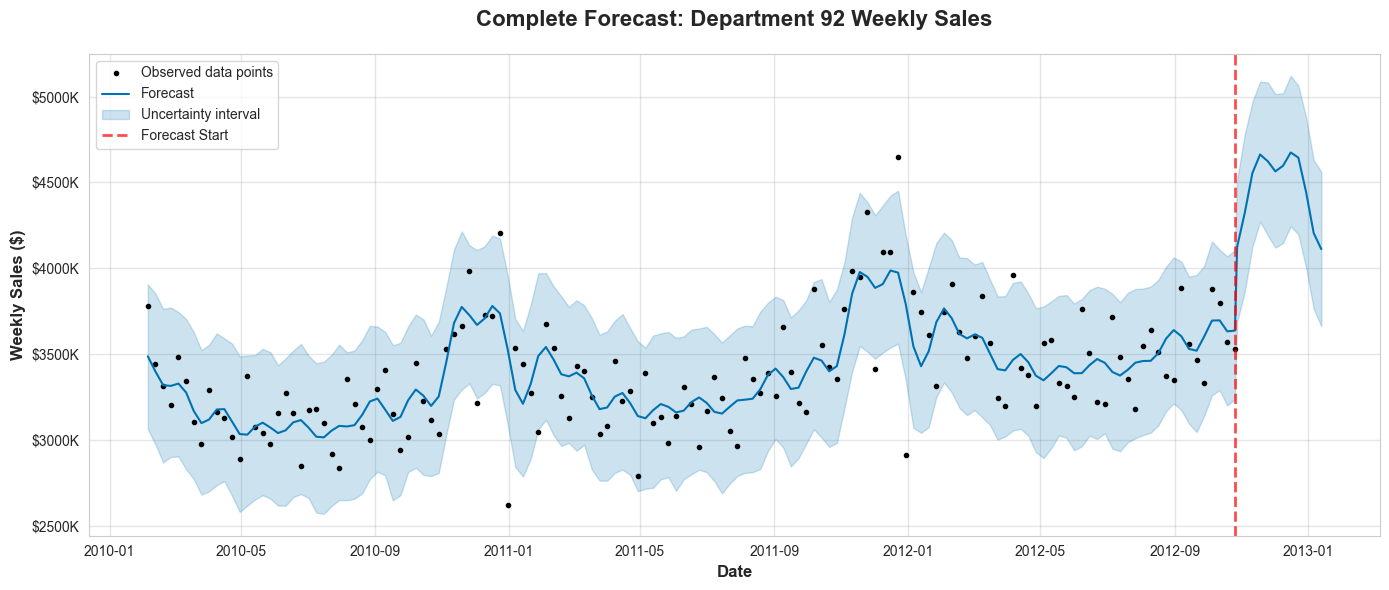


 Reading this chart:
   - Black dots: Historical actual sales
   - Blue line: Model's predictions
   - Light blue shaded area: 95% confidence interval
   - Red dashed line: Where historical data ends / forecast begins


In [19]:
# STEP 18: Visualize the complete forecast

print(" Creating complete forecast visualization...\n")

# Plot the forecast
fig = model.plot(forecast, figsize=(14, 6))
ax = fig.gca()

# Customize the plot
ax.set_title(f'Complete Forecast: Department {SELECTED_DEPT} Weekly Sales', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Weekly Sales ($)', fontsize=12, fontweight='bold')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Add vertical line to show where forecast begins
forecast_start = prophet_df['ds'].max()
ax.axvline(x=forecast_start, color='red', linestyle='--', linewidth=2, 
           label='Forecast Start', alpha=0.7)
ax.legend()

plt.tight_layout()
plt.show()

print("\n Reading this chart:")
print("   - Black dots: Historical actual sales")
print("   - Blue line: Model's predictions")
print("   - Light blue shaded area: 95% confidence interval")
print("   - Red dashed line: Where historical data ends / forecast begins")

 Breaking down forecast components...



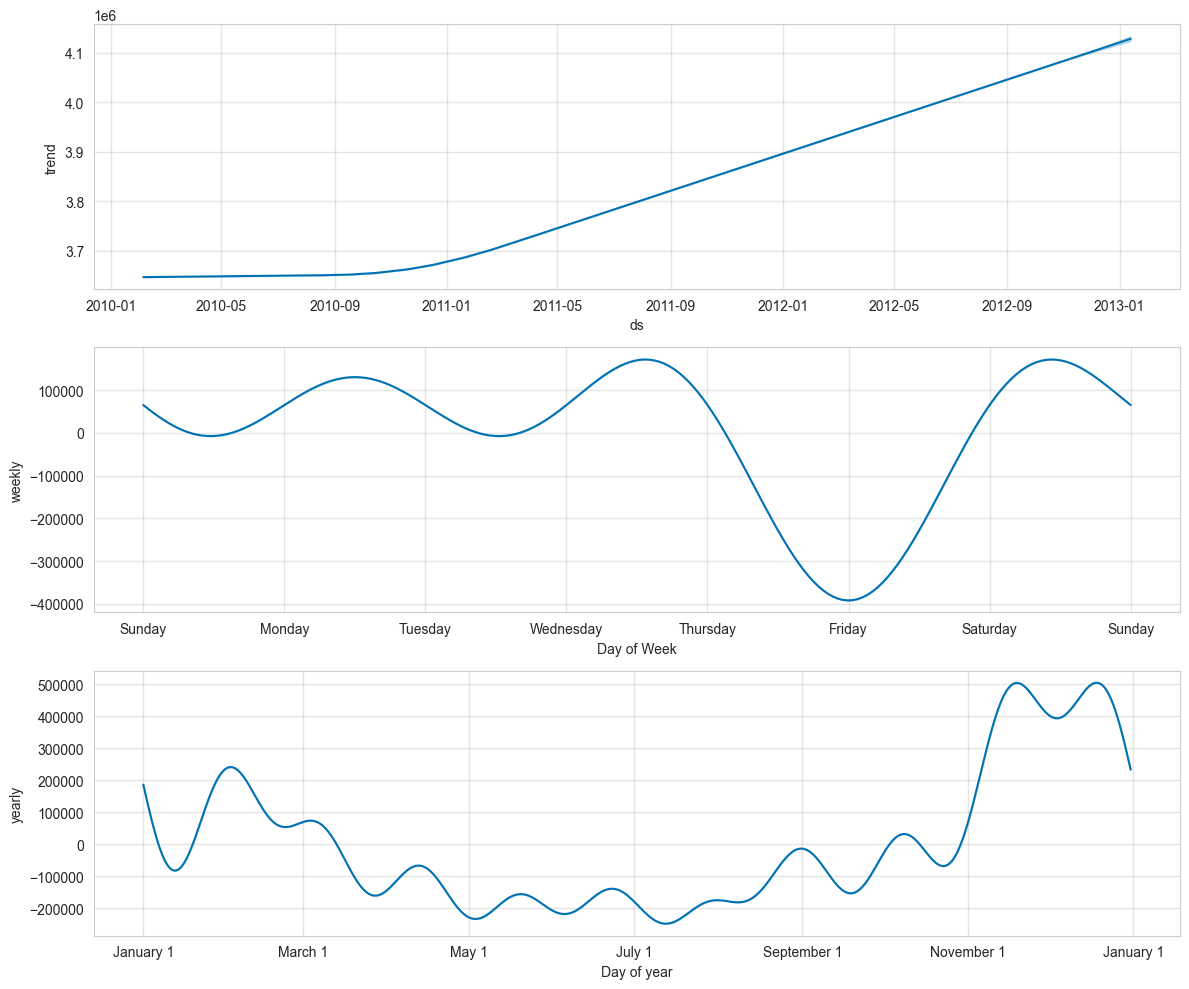


 Understanding the components:

1️ TREND (Top chart)
   - Shows overall direction of sales over time
   - Upward = growing sales, Downward = declining sales, Flat = stable

 YEARLY SEASONALITY (Middle chart)
   - Shows which months typically have higher/lower sales
   - Peaks = high-sales months (e.g., holidays)
   - Troughs = low-sales months

 WEEKLY SEASONALITY (Bottom chart)
   - Shows which days of the week have higher/lower sales
   - 0 = Monday, 6 = Sunday
   - Useful for staffing and inventory planning

 Business Application:
   - Use yearly patterns for long-term inventory planning
   - Use weekly patterns for staff scheduling
   - Combine both for accurate short-term forecasts


In [20]:
# STEP 19: Visualize forecast components
# This shows HOW different factors contribute to the forecast

print(" Breaking down forecast components...\n")

# Prophet automatically creates component plots
fig = model.plot_components(forecast, figsize=(12, 10))

plt.tight_layout()
plt.show()

print("\n Understanding the components:\n")
print("1️ TREND (Top chart)")
print("   - Shows overall direction of sales over time")
print("   - Upward = growing sales, Downward = declining sales, Flat = stable")
print("\n YEARLY SEASONALITY (Middle chart)")
print("   - Shows which months typically have higher/lower sales")
print("   - Peaks = high-sales months (e.g., holidays)")
print("   - Troughs = low-sales months")
print("\n WEEKLY SEASONALITY (Bottom chart)")
print("   - Shows which days of the week have higher/lower sales")
print("   - 0 = Monday, 6 = Sunday")
print("   - Useful for staffing and inventory planning")

print("\n Business Application:")
print("   - Use yearly patterns for long-term inventory planning")
print("   - Use weekly patterns for staff scheduling")
print("   - Combine both for accurate short-term forecasts")

 Creating future forecast chart...



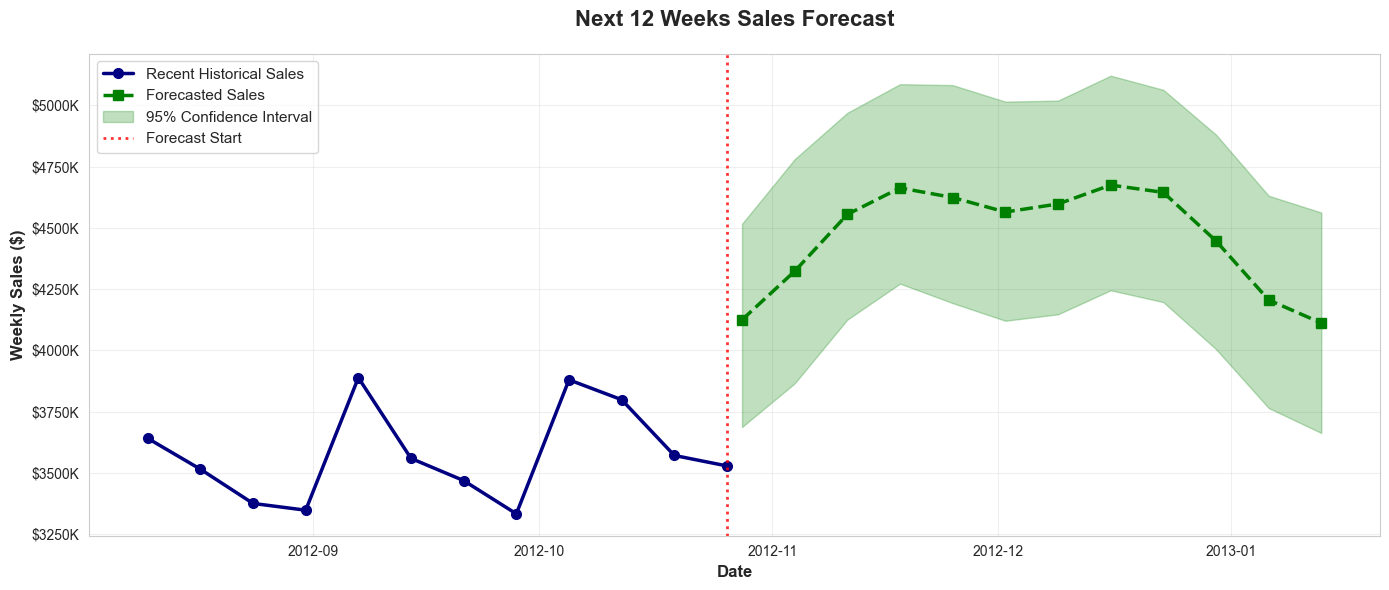

 Future forecast visualization complete!


In [21]:
# STEP 20: Create a focused future forecast visualization

print(" Creating future forecast chart...\n")

fig, ax = plt.subplots(figsize=(14, 6))

# Plot last 12 weeks of historical data (for context)
recent_history = prophet_df.tail(12)
ax.plot(recent_history['ds'], recent_history['y'], 
        marker='o', label='Recent Historical Sales', 
        color='navy', linewidth=2.5, markersize=7)

# Plot future forecast
ax.plot(future_forecast['ds'], future_forecast['yhat'], 
        marker='s', label='Forecasted Sales', 
        color='green', linewidth=2.5, markersize=7, linestyle='--')

# Add confidence interval for future
ax.fill_between(future_forecast['ds'], 
                future_forecast['yhat_lower'], 
                future_forecast['yhat_upper'],
                alpha=0.25, color='green', label='95% Confidence Interval')

# Add vertical line at forecast start
ax.axvline(x=prophet_df['ds'].max(), color='red', linestyle=':', 
           linewidth=2, label='Forecast Start', alpha=0.8)

# Customize
ax.set_title('Next 12 Weeks Sales Forecast', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Weekly Sales ($)', fontsize=12, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

print(" Future forecast visualization complete!")

---
## Phase 9: Business Insights & Recommendations




In [22]:
# STEP 21: Generate business insights

print(" BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*80)

# Analyze future forecast
avg_forecast = future_forecast['yhat'].mean()
avg_historical = prophet_df['y'].mean()
percent_change = ((avg_forecast - avg_historical) / avg_historical) * 100

print("\n FORECAST SUMMARY (Next 12 Weeks):")
print("-" * 80)
print(f"Expected total revenue: ${future_forecast['yhat'].sum():,.2f}")
print(f"Average weekly sales: ${avg_forecast:,.2f}")
print(f"Historical average: ${avg_historical:,.2f}")
print(f"Expected change: {percent_change:+.2f}%")

if percent_change > 5:
    trend = "GROWING"
    action = "Consider increasing inventory levels"
elif percent_change < -5:
    trend = "DECLINING"
    action = "Consider reducing stock to avoid overstocking"
else:
    trend = "STABLE"
    action = "Maintain current inventory strategy"

print(f"\nTrend: {trend}")
print(f"Recommendation: {action}")

# Find peak and low weeks
peak_week = future_forecast.loc[future_forecast['yhat'].idxmax()]
low_week = future_forecast.loc[future_forecast['yhat'].idxmin()]

print("\n" + "="*80)
print(" KEY DATES TO WATCH:")
print("-" * 80)
print(f"\n🔺 PEAK WEEK: {peak_week['ds'].date()}")
print(f"   Expected sales: ${peak_week['yhat']:,.2f}")
print(f"   Range: ${peak_week['yhat_lower']:,.2f} - ${peak_week['yhat_upper']:,.2f}")
print("    Action: Ensure maximum stock availability")
print("             Schedule extra staff if needed")

print(f"\n🔻 LOW WEEK: {low_week['ds'].date()}")
print(f"   Expected sales: ${low_week['yhat']:,.2f}")
print(f"   Range: ${low_week['yhat_lower']:,.2f} - ${low_week['yhat_upper']:,.2f}")
print("    Action: Good time for inventory clearance")
print("             Consider promotions to boost sales")

# Variability analysis
forecast_std = future_forecast['yhat'].std()
cv_forecast = (forecast_std / avg_forecast) * 100

print("\n" + "="*80)
print(" DEMAND VARIABILITY:")
print("-" * 80)
print(f"Standard deviation: ${forecast_std:,.2f}")
print(f"Coefficient of variation: {cv_forecast:.2f}%")

if cv_forecast < 10:
    print("    Very stable demand - Easy to plan inventory")
elif cv_forecast < 20:
    print("    Moderate variability - Maintain buffer stock")
else:
    print("    High variability - Keep flexible inventory strategy")

print("\n" + "="*80)
print(" ACTIONABLE RECOMMENDATIONS:")
print("-" * 80)
print("\n1. INVENTORY MANAGEMENT")
print(f"   • Target weekly stock: ${avg_forecast * 1.2:,.2f} (20% buffer)")
print(f"   • Minimum safety stock: ${low_week['yhat']:,.2f}")
print(f"   • Maximum stock for peak: ${peak_week['yhat'] * 1.3:,.2f}")

print("\n2. FINANCIAL PLANNING")
print(f"   • Expected 12-week revenue: ${future_forecast['yhat'].sum():,.2f}")
print(f"   • Confidence range: ${future_forecast['yhat_lower'].sum():,.2f} - ${future_forecast['yhat_upper'].sum():,.2f}")
print(f"   • Plan for middle scenario: ${future_forecast['yhat'].sum():,.2f}")

print("\n3. OPERATIONAL PLANNING")
print("   • Review staffing levels for peak week")
print("   • Coordinate with suppliers 2-3 weeks in advance")
print("   • Monitor actual vs forecast weekly and adjust")

print("\n" + "="*80)

 BUSINESS INSIGHTS & RECOMMENDATIONS

 FORECAST SUMMARY (Next 12 Weeks):
--------------------------------------------------------------------------------
Expected total revenue: $53,532,539.27
Average weekly sales: $4,461,044.94
Historical average: $3,384,219.17
Expected change: +31.82%

Trend: GROWING
Recommendation: Consider increasing inventory levels

 KEY DATES TO WATCH:
--------------------------------------------------------------------------------

🔺 PEAK WEEK: 2012-12-16
   Expected sales: $4,674,411.75
   Range: $4,244,876.43 - $5,120,910.37
    Action: Ensure maximum stock availability
             Schedule extra staff if needed

🔻 LOW WEEK: 2013-01-13
   Expected sales: $4,111,445.60
   Range: $3,662,382.57 - $4,562,340.46
    Action: Good time for inventory clearance
             Consider promotions to boost sales

 DEMAND VARIABILITY:
--------------------------------------------------------------------------------
Standard deviation: $214,167.88
Coefficient of variation: 

---
## Phase 10: Export Results & Documentation




In [23]:
# STEP 22: Save forecast results to CSV

print(" Saving forecast results...\n")

# Create output directory if it doesn't exist
import os
output_dir = 'outputs'
os.makedirs(output_dir, exist_ok=True)

# Save future forecast
future_export = pd.DataFrame({
    'Date': future_forecast['ds'],
    'Predicted_Sales': future_forecast['yhat'],
    'Lower_Bound_95': future_forecast['yhat_lower'],
    'Upper_Bound_95': future_forecast['yhat_upper'],
    'Trend': future_forecast['trend'],
    'Yearly_Seasonality': future_forecast['yearly'],
    'Weekly_Seasonality': future_forecast['weekly']
})

future_file = f'{output_dir}/future_forecast_{SELECTED_DEPT}.csv'
future_export.to_csv(future_file, index=False)
print(f" Saved: {future_file}")

# Save complete forecast (historical + future)
complete_file = f'{output_dir}/complete_forecast_{SELECTED_DEPT}.csv'
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'yearly', 'weekly']].to_csv(complete_file, index=False)
print(f" Saved: {complete_file}")

# Save model metrics summary
summary = pd.DataFrame({
    'Metric': ['Total Weeks Analyzed', 'Future Weeks Forecasted', 'Average Predicted Sales', 'Total Predicted Revenue'],
    'Value': [
        len(prophet_df),
        len(future_forecast),
        f"${future_forecast['yhat'].mean():,.2f}",
        f"${future_forecast['yhat'].sum():,.2f}"
    ]
})

summary_file = f'{output_dir}/forecast_summary_{SELECTED_DEPT}.csv'
summary.to_csv(summary_file, index=False)
print(f" Saved: {summary_file}")

print(f"\n All files saved in '{output_dir}/' directory")
print("\n You can now:")
print("   • Open these CSV files in Excel")
print("   • Import into Tableau/Power BI for dashboards")
print("   • Share with business stakeholders")
print("   • Use for automated reporting")

 Saving forecast results...

 Saved: outputs/future_forecast_92.csv
 Saved: outputs/complete_forecast_92.csv
 Saved: outputs/forecast_summary_92.csv

 All files saved in 'outputs/' directory

 You can now:
   • Open these CSV files in Excel
   • Import into Tableau/Power BI for dashboards
   • Share with business stakeholders
   • Use for automated reporting


---
## Project Summary & Learning Outcomes


1. Loaded and explored real-world retail sales data
2. Performed data cleaning and preparation
3. Conducted exploratory data analysis (EDA)
4. Built a time series forecasting model using Facebook Prophet
5. Generated 12-week sales forecasts
6. Evaluated model accuracy (MAE, RMSE, MAPE)
7. Created professional visualizations
8. Translated technical results into business insights
9. Exported results for business use



